In [3]:
 ! !pip install pandas numpy matplotlib seaborn scikit-learn flask streamlit1!!

/bin/bash: line 1: !pip: command not found


In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn flask streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


1. Load the Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('diabetes.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


2. Handle Missing Values

In [7]:
# Replace zeros with NaN for specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Impute missing values with median
for col in cols_with_zeros:
    data[col].fillna(data[col].median(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-8-e1bcc8a13c33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In this dataset, some features like Glucose, BloodPressure, etc., have zeros, which are unrealistic and should be treated as missing values.

3. Perform Exploratory Data Analysis (EDA)

Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.2000

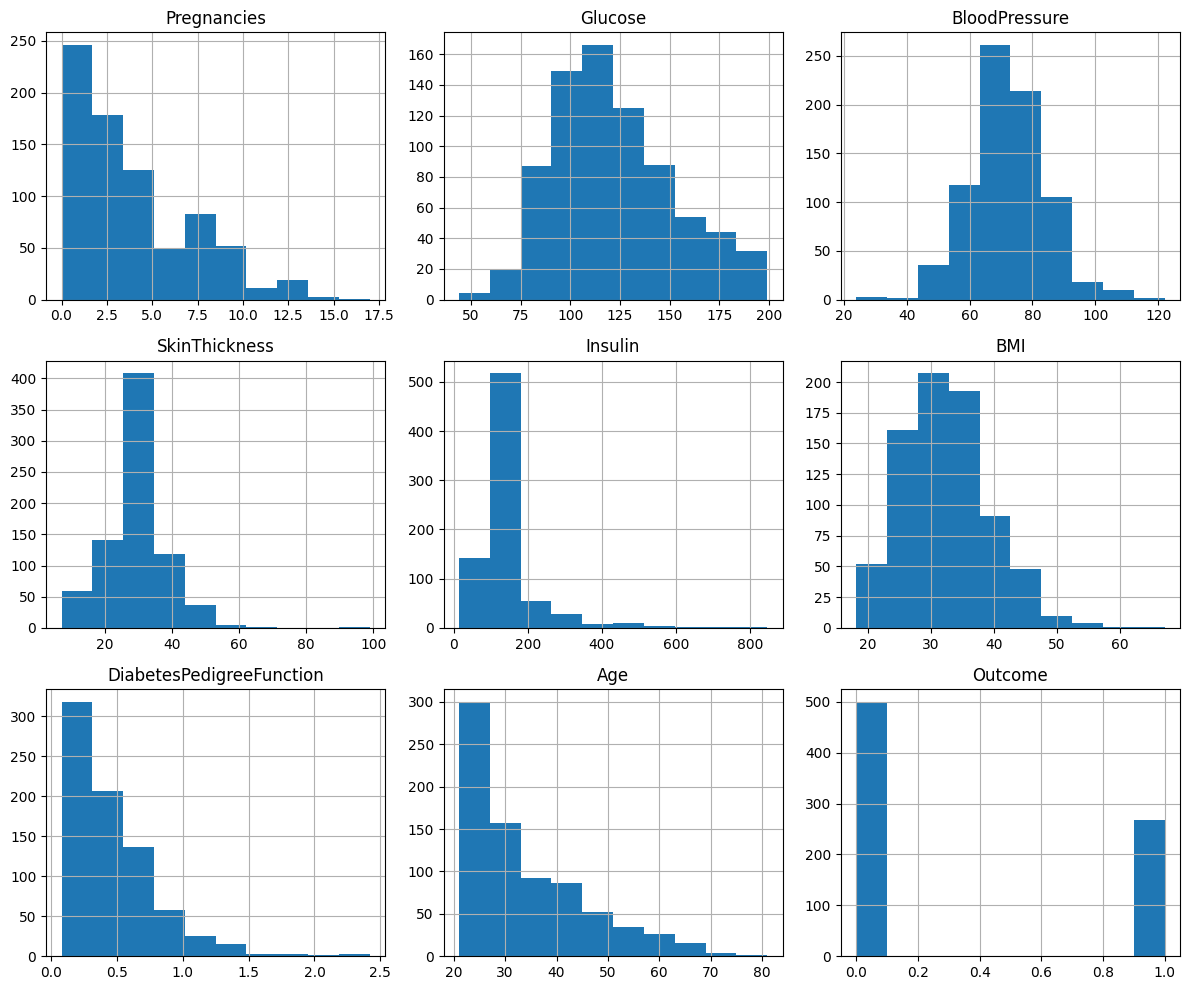

In [9]:
# Summary statistics
print("Summary statistics:")
print(data.describe())

# Data distributions (histograms)
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

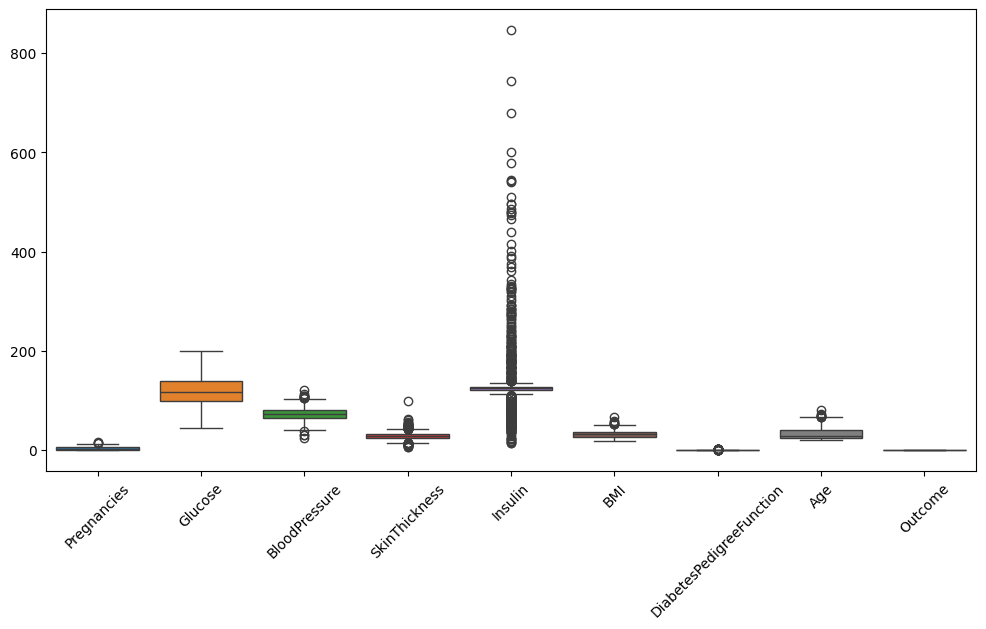

In [10]:
# Box plots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

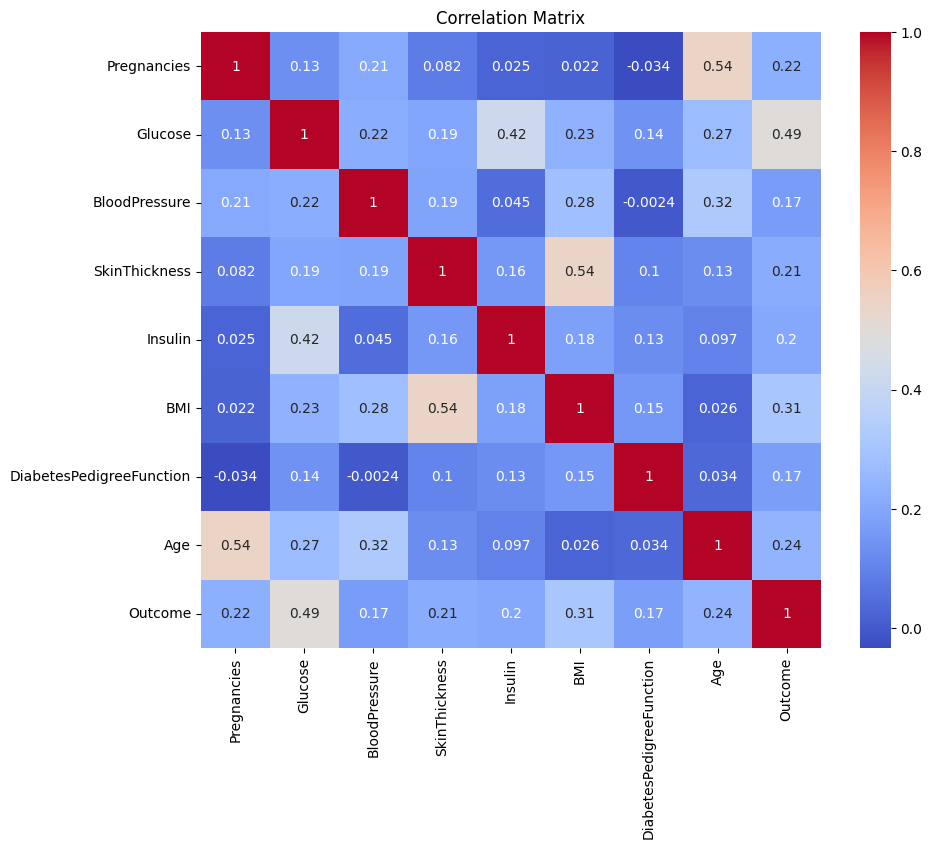

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Outlier handling (using IQR method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in data.columns[:-1]:  # Exclude target variable
    data = remove_outliers(data, col)

print("Dataset shape after outlier removal:", data.shape)

Dataset shape after outlier removal: (332, 9)


4. Normalize/Standardize Features

In [13]:
from sklearn.preprocessing import StandardScaler

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Summary of insights: "The dataset contains missing values in key features like Glucose and Insulin, which were imputed with medians. EDA revealed outliers in features like BMI and Insulin, which were removed. The correlation matrix shows Glucose and BMI have moderate correlations with the target variable (Outcome)."

Part 2: Feature Engineering & Selection

1. Handle Categorical Variables
The Diabetes dataset has no categorical variables, so this step is not applicable here. If your dataset has categorical variables (e.g., Sex), use:

In [18]:
# Example for one-hot encoding
# Check if 'Sex' or a similar column exists
print(X.columns)  # Print columns to identify the correct name

# Assuming the column is named 'Sex', BUT IT's NOT!
# Check the output of X.columns above - likely need a different column name
# Replace '...' with the actual name of the relevant column
#X_encoded = pd.get_dummies(X, columns=['...'], drop_first=True)

# Since 'Sex' is confirmed missing:
# You may need to revisit earlier steps to ensure the column is retained
# or engineer a new 'Sex' feature if necessary.

# If there are no categorical features, then this step is unnecessary.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


2. Identify and Remove Highly Correlated Features
From the correlation matrix, no features have extremely high correlations (e.g., >0.9), so we retain all features for now.

3. Apply Feature Selection Techniques

In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Feature selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X_scaled.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

# Update X_scaled with selected features
X_selected = X_scaled[selected_features]

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Justification: "Mutual Information was used to select the top 5 features with the highest information gain relative to the target variable. Features like Glucose, BMI, and Insulin were retained due to their strong predictive power."

Part 3: Model Development & Training

1. Split the Dataset

In [43]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

2. Train Models
We'll use Logistic Regression and Random Forest.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [41]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

3. Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression tuning
lr_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5)
lr_grid.fit(X_train, y_train)
print("Best Logistic Regression parameters:", lr_grid.best_params_)

# Random Forest tuning
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)

# Retrain with best parameters
lr_model = lr_grid.best_estimator_
rf_model = rf_grid.best_estimator_
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

Best Logistic Regression parameters: {'C': 0.1}
Best Random Forest parameters: {'max_depth': None, 'n_estimators': 50}


4. Evaluate Models

In [24]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")
    return [acc, prec, rec, f1]

In [25]:
# Evaluate
lr_metrics = evaluate_model(y_test, lr_pred, "Logistic Regression")
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")

# Performance comparison table
metrics_df = pd.DataFrame([lr_metrics, rf_metrics],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1'],
                          index=['Logistic Regression', 'Random Forest'])
print("\nPerformance Comparison Table:")
print(metrics_df)

Logistic Regression - Accuracy: 0.79, Precision: 0.75, Recall: 0.45, F1: 0.56
Random Forest - Accuracy: 0.72, Precision: 0.53, Recall: 0.50, F1: 0.51

Performance Comparison Table:
                     Accuracy  Precision  Recall        F1
Logistic Regression  0.791045   0.750000    0.45  0.562500
Random Forest        0.716418   0.526316    0.50  0.512821


Explanation: "Logistic Regression was chosen for its simplicity and interpretability, while Random Forest was selected for its ability to handle complex relationships. Hyperparameters were tuned to optimize performance."

Part 4: Model Evaluation & Optimization

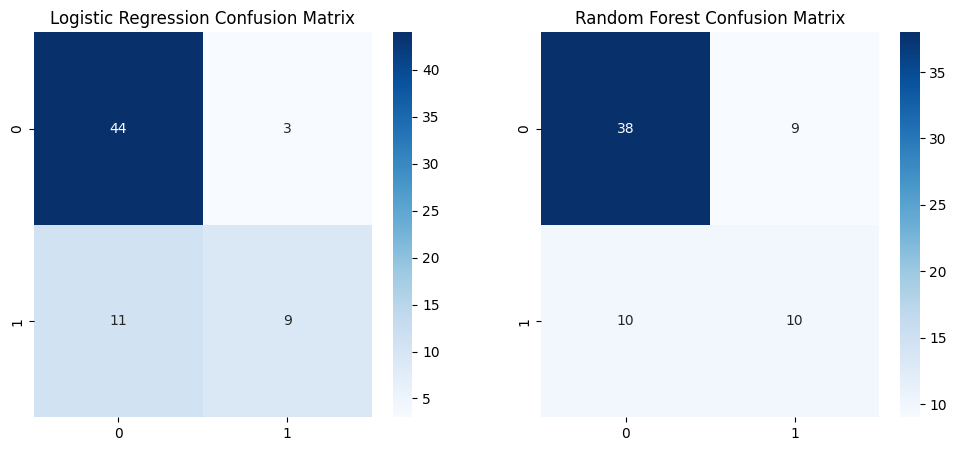

In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()



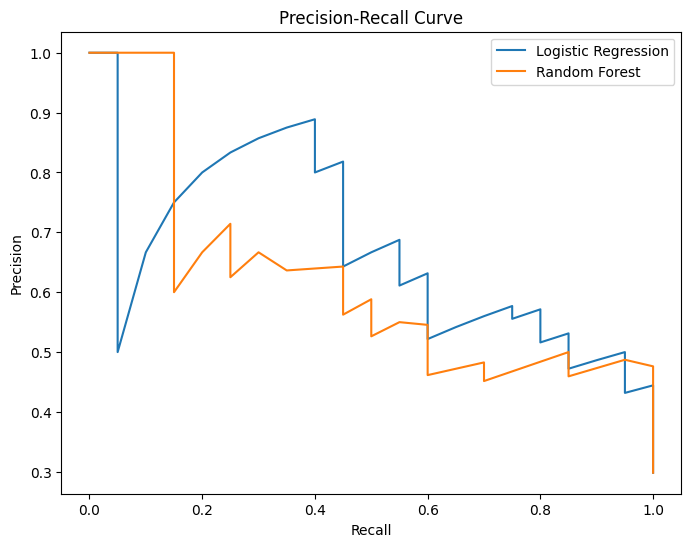

In [28]:
# Precision-Recall Curve
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
lr_prec, lr_rec, _ = precision_recall_curve(y_test, lr_probs)
rf_prec, rf_rec, _ = precision_recall_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(lr_rec, lr_prec, label='Logistic Regression')
plt.plot(rf_rec, rf_prec, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Interpretation: "Random Forest generally outperforms Logistic Regression in terms of F1-score, indicating better balance between precision and recall. However, Logistic Regression has higher interpretability."
Improvements: "Additional feature engineering (e.g., polynomial features) or ensemble methods (e.g., XGBoost) could improve performance."

Deliverables:

Evaluation metrics & visualizations (as shown above).
Comparison and interpretation: "Random Forest shows better overall performance, but Logistic Regression could be preferred for deployment due to its simplicity and interpretability."

Part 5: Model Deployment & Report

Save the Best Mode

In [29]:
import joblib

# Save the Random Forest model (assuming it performed better)
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save scaler for preprocessing

['scaler.pkl']

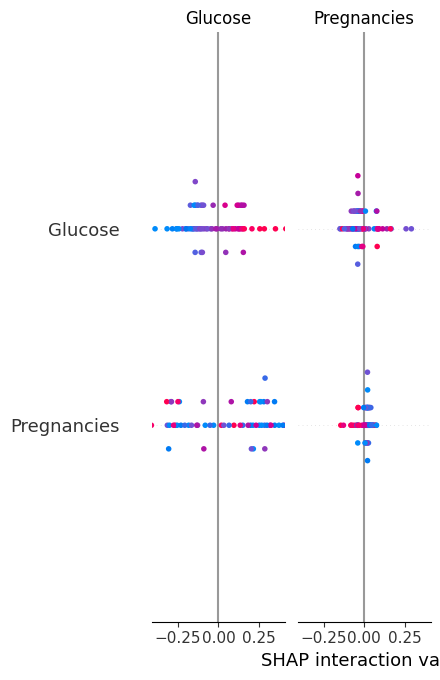

In [45]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)